In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

# 1
im1 = Image.open('img14g.tif')
Y = np.array(im1)

# im2 = Image.open('img14bl.tif')
# X = np.array(im2)

# im2 = Image.open('img14gn.tif')
# X = np.array(im2)

im2 = Image.open('img14sp.tif')
X = np.array(im2)

In [20]:
# 2

# temp populates in raster order currently

# print(np.shape(X))
# print(np.shape(Y)) each 512x768
m, n = np.shape(X)

i = 3 # do these need to start at a particular value so nothing breaks?
dim = 7
Y_pi = []
Z_pi = []
# test = np.append(Y_pi, 5)
# print(test)

print(np.shape(X))
X = np.pad(X,((3,3),(3,3)))
print(np.shape(X))

while i <= m:
    j = 3
    while j <= n:
        Y_pi = np.append(Y_pi, Y[i,j])
        
        # get 7x7 = 49 nearest pixels at [i, j]
        temp = np.zeros((dim, dim))
        kset = np.array([3, 2, 1, 0, -1, -2, -3])
        lset = np.array([3, 2, 1, 0, -1, -2, -3])
        for k in range(dim):
            for l in range(dim):
                temp[k,l] = X[i-kset[k],j-lset[l]]
                
        # reshape to a row vector
        temp = np.reshape(temp, (1, dim**2))
        # append this to next row of Z
        Z_pi = np.append(Z_pi, temp)
        
        j += 20
    i += 20


length = np.size(Y_pi)
print("size of Y_pi = ", length)
Y_pi = np.reshape(Y_pi, (length, 1))
Z_pi = np.reshape(Z_pi, (length, dim**2))

# np.set_printoptions(threshold = np.inf)
# print("Z_pi = ", Z_pi)

print("Y = ", Y_pi)
# print(np.size(Y_pi))
print(np.shape(Y_pi))
# print(Y)
# print(X)
# print(np.shape(Z_pi))
np.set_printoptions(linewidth=np.inf)
print("Z = ", Z_pi)

# temp = np.zeros((dim, dim))
# temp[0,0] = 5
# print(temp)

R_hatzz = np.dot(np.transpose(Z_pi),Z_pi)*(1/length)
r_hatzy = np.dot(np.transpose(Z_pi),Y_pi)*(1/length)
print("R = ", R_hatzz)



(512, 768)
(518, 774)
size of Y_pi =  1014
Y =  [[ 70.]
 [186.]
 [185.]
 ...
 [ 64.]
 [ 66.]
 [250.]]
(1014, 1)
Z =  [[  0.   0.   0. ...  99. 101.  70.]
 [  0.   0.   0. ... 186. 186. 186.]
 [  0.   0.   0. ... 185. 185. 185.]
 ...
 [ 63.  64.  66. ...  57.   0.   0.]
 [ 71.  74.  71. ...  65. 168.  66.]
 [235. 235. 237. ... 238. 236. 255.]]
R =  [[17452.96351085 17251.66074951 17082.58185404 ... 17069.11439842 16947.36094675 16952.73175542]
 [17251.66074951 17422.29191321 17192.01972387 ... 17097.98126233 17018.93589744 17020.0591716 ]
 [17082.58185404 17192.01972387 17347.95857988 ... 17003.29684418 16930.39349112 16920.59664694]
 ...
 [17069.11439842 17097.98126233 17003.29684418 ... 18303.08382643 18018.71893491 17974.69822485]
 [16947.36094675 17018.93589744 16930.39349112 ... 18018.71893491 18258.58678501 18007.3086785 ]
 [16952.73175542 17020.0591716  16920.59664694 ... 17974.69822485 18007.3086785  18320.46055227]]


In [3]:
# 3
np.set_printoptions(linewidth=np.inf)
theta_star = np.dot(np.linalg.inv(R_hatzz), r_hatzy)
# print(theta_star)
# print(np.shape(theta_star))

theta_starsq = np.reshape(theta_star, (dim, dim))
print(theta_starsq)
# print(np.shape(theta_starsq))

print(np.sum(theta_star))

error = Y_pi - np.dot(Z_pi,theta_star)
print(np.sum(error))
rmse = np.sqrt(np.sum(error**2)/length)
print(rmse)

[[-0.03008728 -0.0322477   0.0213336  -0.04465128 -0.01242194  0.01097982  0.00387093]
 [-0.01064806  0.00622445  0.02520621  0.0096052  -0.02261044 -0.04280791 -0.00317061]
 [-0.00438541  0.0190518   0.0090709   0.03551449  0.01880543  0.03731365  0.03801995]
 [ 0.00232254 -0.03511802  0.00973322 -0.00241192 -0.00890723 -0.04438832 -0.00998791]
 [-0.00913994  0.00173587  0.00046863 -0.01861896 -0.01917184  0.05496598  0.08864654]
 [-0.02939398 -0.03493552 -0.02008879 -0.03894411 -0.00201718  0.04792006  0.17068996]
 [ 0.0559715   0.04983432  0.07536619  0.01987913  0.08651964  0.13957389  0.44292771]]
1.005397238253817
-174.24418382594524
9.192581461603663


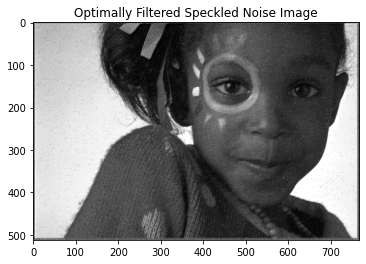

In [4]:
# 4

# note: may need to revisit in order to figure out how to filter the edges..
# would need some more sophisticated logic for which values of xs and theta
# are non zero... as the size must match for inner product on p1 of lab

X = X[3:m+3,3:n+3]
yhat = np.zeros((m, n))

# print(np.dot(X[3,3],theta_star))

dim = 7

for i in range(m):
    for j in range(n):
        
        if i > 3 and i <= m-4 and j > 3 and j <= n-4:
            # get 7x7 = 49 nearest pixels at [i, j]
            temp = np.zeros((dim, dim))
            kset = np.array([3, 2, 1, 0, -1, -2, -3])
            lset = np.array([3, 2, 1, 0, -1, -2, -3])
            for k in range(dim):
                for l in range(dim):
                    temp[k,l] = X[i-kset[k],j-lset[l]]
            
            # reshape to a row vector
            temp = np.reshape(temp, (1, dim**2))
            
            yhat[i,j] = np.dot(temp,theta_star)
            
#             if i == 50 and j == 50:
#                 print(temp)
#                 print(theta_star)
#                 print(np.dot(temp,theta_star))
            
        else:
            yhat[i,j] = X[i,j]
        
plt.figure()
plt.title("Optimally Filtered Speckled Noise Image")
plt.imshow(yhat,cmap=plt.cm.gray,vmin=0,vmax=255)

# print(np.reshape(temp, (7, 7)))
# print(yhat[370,670])

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("specklednoise_filtered.tif")
png1.close()